In [1]:
import numpy as np
import torch

device = torch.device(
    "mps"
    if torch.backends.mps.is_available()
    else "cuda" if torch.cuda.is_available() else "cpu"
)


class ToTensor:
    def __call__(self, inputs, targets):
        inputs = np.reshape(inputs, [28 * 28])
        return torch.tensor(inputs), torch.tensor(targets)


class MNIST_DATASET(torch.utils.data.Dataset):
    def __init__(self, transform=None):
        self.x_train = np.load("./dataset/mnist/x_train.npy")
        self.y_train_label = np.load("./dataset/mnist/y_train_label.npy")

        self.transform = transform

    def __getitem__(self, index):
        image = self.x_train[index]
        label = self.y_train_label[index]

        if self.transform:
            image, label = self.transform(image, label)
        return image, label

    def __len__(self):
        return len(self.y_train_label)


import torch
import numpy as np

batch_size = 320
epochs = 42

mnist_dataset = MNIST_DATASET(transform=ToTensor())
from torch.utils.data import DataLoader

train_loader = DataLoader(mnist_dataset, batch_size=batch_size)


class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = torch.nn.Flatten()
        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 312),
            torch.nn.ReLU(),
            torch.nn.Linear(312, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 10),
        )

    def forward(self, input):
        x = self.flatten(input)
        logits = self.linear_relu_stack(x)
        return logits


model = NeuralNetwork()
model = model.to(device)
torch.save(model, "./model.pth")
model = torch.compile(model)

loss_fu = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(epochs):
    train_loss = 0
    for image, label in train_loader:
        train_image = image.to(device)
        train_label = label.to(device)
        pred = model(train_image)
        loss = loss_fu(pred, train_label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss = train_loss / batch_size
    print("epoch: ", epoch, "train_loss:", round(train_loss, 2))

epoch:  0 train_loss: 0.76
epoch:  1 train_loss: 0.24
epoch:  2 train_loss: 0.19
epoch:  3 train_loss: 0.17
epoch:  4 train_loss: 0.15
epoch:  5 train_loss: 0.14
epoch:  6 train_loss: 0.13
epoch:  7 train_loss: 0.12
epoch:  8 train_loss: 0.11
epoch:  9 train_loss: 0.1
epoch:  10 train_loss: 0.1
epoch:  11 train_loss: 0.09
epoch:  12 train_loss: 0.09
epoch:  13 train_loss: 0.08
epoch:  14 train_loss: 0.08
epoch:  15 train_loss: 0.07
epoch:  16 train_loss: 0.07
epoch:  17 train_loss: 0.07
epoch:  18 train_loss: 0.06
epoch:  19 train_loss: 0.06
epoch:  20 train_loss: 0.06
epoch:  21 train_loss: 0.05
epoch:  22 train_loss: 0.05
epoch:  23 train_loss: 0.05
epoch:  24 train_loss: 0.05
epoch:  25 train_loss: 0.04
epoch:  26 train_loss: 0.04
epoch:  27 train_loss: 0.04
epoch:  28 train_loss: 0.04
epoch:  29 train_loss: 0.04
epoch:  30 train_loss: 0.04
epoch:  31 train_loss: 0.03
epoch:  32 train_loss: 0.03
epoch:  33 train_loss: 0.03
epoch:  34 train_loss: 0.03
epoch:  35 train_loss: 0.03
epoc

In [2]:
import torch
import torch.nn as nn

class FeedForWard(nn.Module):
    def __init__(self, embdding_dim=6, scale=2):
        super().__init__()
        # 第一个线性层，将嵌入维度扩展到 embdding_dim * scale
        self.linear1 = nn.Linear(embdding_dim, embdding_dim * scale)
        # 第一个 ReLU 激活函数
        self.relu_1 = nn.ReLU()
        # 第二个线性层，将维度还原回 embdding_dim
        self.linear2 = nn.Linear(embdding_dim * scale, embdding_dim)
        # 第二个 ReLU 激活函数
        self.relu_2 = nn.ReLU()
        # 层归一化层，对 embdding_dim 维度进行标准化
        self.layer_norm = nn.LayerNorm(normalized_shape=embdding_dim)

    def forward(self, tensor):
        # 输入通过第一个线性层
        embedding = self.linear1(tensor)
        # 应用第一个 ReLU 激活函数
        embedding = self.relu_1(embedding)
        # 通过第二个线性层
        embedding = self.linear2(embedding)
        # 应用第二个 ReLU 激活函数
        embedding = self.relu_2(embedding)
        # 应用层归一化层
        embedding = self.layer_norm(embedding)
        # 返回最终的 embedding 张量
        return embedding



# 创建一个实例
feed_forward = FeedForWard()

# 创建一个示例输入张量
input_tensor = torch.randn(2, 5, 6)  # batch_size=16, seq_len=50, embdding_dim=312

# 通过前向传播
output_tensor = feed_forward(input_tensor)

print(f"Input:",{input_tensor})

# 打印输出张量的形状
print(f"Output shape: {output_tensor.shape}")

print(f"Output:",{output_tensor})

Input: {tensor([[[-0.0988, -0.2718,  1.1984, -2.0604,  0.8979, -0.9809],
         [ 1.4178,  0.4604,  0.3894, -0.6284,  0.0812, -0.0451],
         [-0.2217,  1.5471, -1.6494, -0.8159, -1.3790,  0.0699],
         [-0.6230,  0.4778,  1.4996, -1.2031,  0.1613,  1.6306],
         [-1.3993,  0.6014, -1.4235,  0.8383, -0.5575,  1.2043]],

        [[ 0.6486,  0.5635, -1.2114, -0.0526,  0.2294, -0.5899],
         [ 0.0232,  0.5679,  0.6110, -0.3132, -1.0478,  0.8044],
         [ 0.1150, -1.2195, -2.2292,  1.4079, -0.3238,  0.4868],
         [ 0.6611,  0.9268,  0.3023, -0.7308, -1.2135,  0.7199],
         [-1.0321, -1.8744, -0.8974,  2.6071,  1.4400, -1.2223]]])}
Output shape: torch.Size([2, 5, 6])
Output: {tensor([[[-1.0472, -1.0472,  0.2974, -0.6934,  0.9849,  1.5056],
         [-0.9535, -0.9535,  1.5072,  0.3333, -0.9138,  0.9805],
         [-0.8653, -1.0503,  1.1086,  1.1335, -1.0503,  0.7238],
         [-0.9975, -0.9975,  0.8733, -0.9975,  1.1188,  1.0003],
         [-1.5882,  0.1446, -1.0

In [3]:
import torch
import torch.nn as nn
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        # 定义一个线性层，输入维度为3，输出维度为5
        self.linear = nn.Linear(3, 5)

    def forward(self, x):
        # 将输入通过线性层
        x = self.linear(x)
        return x
# 创建模型实例
model = SimpleNet()

# 创建一个示例输入张量，形状为 (2, 3)，即批量大小为2，每个样本有3个特征
input_tensor = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])

# 进行前向传播
output_tensor = model(input_tensor)

# 打印输出张量
print("Input Tensor:")
print(input_tensor)
print("\nOutput Tensor:")
print(output_tensor)

Input Tensor:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

Output Tensor:
tensor([[ 0.1135,  1.4329, -0.5588, -0.7882,  0.7541],
        [ 1.8616,  3.8924, -1.3953, -2.4332,  1.3017]],
       grad_fn=<AddmmBackward0>)


Training with batch_size=1
Training with batch_size=8
Training with batch_size=32
Training with batch_size=64
Training with batch_size=128
Training with batch_size=256
Training with batch_size=1000


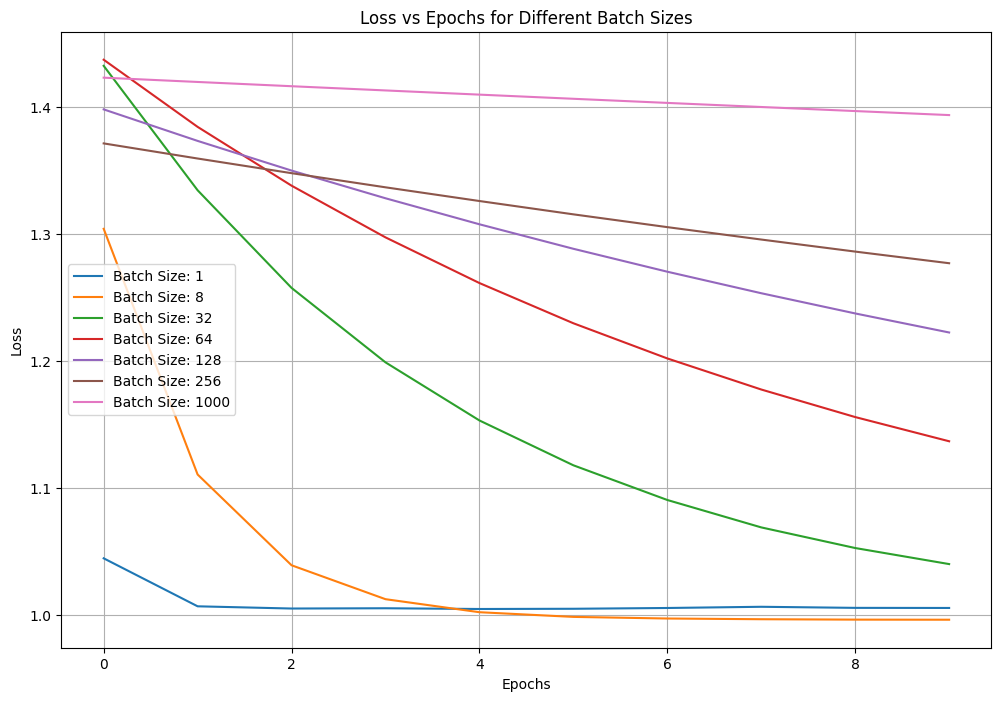

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# 定义一个简单的神经网络
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.linear = nn.Linear(3, 5)

    def forward(self, x):
        x = self.linear(x)
        return x

# 创建一个示例数据集
input_data = torch.randn(1000, 3)  # 1000 个样本，每个样本有 3 个特征
target_data = torch.randn(1000, 5)  # 1000 个目标，每个目标有 5 个特征

# 定义不同的 batch_sizes
batch_sizes = [1, 8, 32, 64, 128, 256, 1000]

# 训练函数
def train_model(batch_size):
    dataset = TensorDataset(input_data, target_data)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    model = SimpleNet()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    
    losses = []
    num_epochs = 10
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        
        epoch_loss = running_loss / len(dataloader.dataset)
        losses.append(epoch_loss)
    
    return losses

# 训练并收集每个 batch_size 的损失
losses_dict = {}
for batch_size in batch_sizes:
    print(f"Training with batch_size={batch_size}")
    losses = train_model(batch_size)
    losses_dict[batch_size] = losses

# 绘制损失曲线
plt.figure(figsize=(12, 8))
for batch_size, losses in losses_dict.items():
    plt.plot(losses, label=f'Batch Size: {batch_size}')

plt.title('Loss vs Epochs for Different Batch Sizes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()





In [5]:
import torch
import torch.nn as nn

# 定义一个包含 LayerNorm 层的简单神经网络
class SimpleNet(nn.Module):
    def __init__(self, embedding_dim=312):
        super(SimpleNet, self).__init__()
        # 定义一个线性层
        self.linear1 = nn.Linear(embedding_dim, embedding_dim * 4)
        # 定义 ReLU 激活函数
        self.relu_1 = nn.ReLU()
        # 定义另一个线性层
        self.linear2 = nn.Linear(embedding_dim * 4, embedding_dim)
        # 定义 ReLU 激活函数
        self.relu_2 = nn.ReLU()
        # 定义 LayerNorm 层
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

    def forward(self, x):
        # 通过第一个线性层
        x = self.linear1(x)
        # 应用第一个 ReLU 激活函数
        x = self.relu_1(x)
        # 通过第二个线性层
        x = self.linear2(x)
        # 应用第二个 ReLU 激活函数
        x = self.relu_2(x)
        # 应用 LayerNorm 层
        x = self.layer_norm(x)
        return x

# 创建模型实例
model = SimpleNet()

# 创建一个示例输入张量，形状为 (batch_size, seq_len, embedding_dim)
batch_size = 4
seq_len = 10
embedding_dim = 312
input_tensor = torch.randn(batch_size, seq_len, embedding_dim)

# 进行前向传播
output_tensor = model(input_tensor)

# 打印输入和输出张量的形状
print("Input Tensor Shape:", input_tensor)
print("Output Tensor Shape:", output_tensor)





Input Tensor Shape: tensor([[[-0.2782,  0.0776,  0.2244,  ..., -1.2777, -0.0027,  1.7186],
         [ 0.4644,  0.2908, -1.4442,  ..., -0.7113,  1.1503, -0.1998],
         [ 0.2959, -0.3481,  0.0677,  ...,  0.7561,  0.1573, -1.2594],
         ...,
         [-0.0215,  0.4629,  0.2310,  ...,  0.0139, -1.1032, -0.0837],
         [ 0.0786,  1.6951, -0.9327,  ...,  1.0462, -1.0035, -0.0447],
         [-2.1016, -0.7497,  0.2018,  ..., -0.5484, -0.1203, -0.3398]],

        [[ 0.9283, -0.6083,  1.3114,  ...,  0.3458, -0.7245,  0.2219],
         [-0.4017,  1.8997,  0.9850,  ...,  1.2398, -0.3614,  0.5650],
         [-0.8631,  0.3453, -0.6810,  ..., -1.2402, -0.7161,  0.2130],
         ...,
         [-0.9578,  0.7841, -1.5686,  ...,  0.9491, -0.0238, -0.9783],
         [ 1.3936, -0.2998,  0.4966,  ..., -0.9067,  0.7751,  0.6507],
         [ 1.5107, -0.4014,  0.1129,  ...,  0.6474, -0.6070, -1.5402]],

        [[ 0.3112,  0.8331,  1.0976,  ..., -0.5965, -1.3353,  0.2184],
         [-0.0078,  1.132

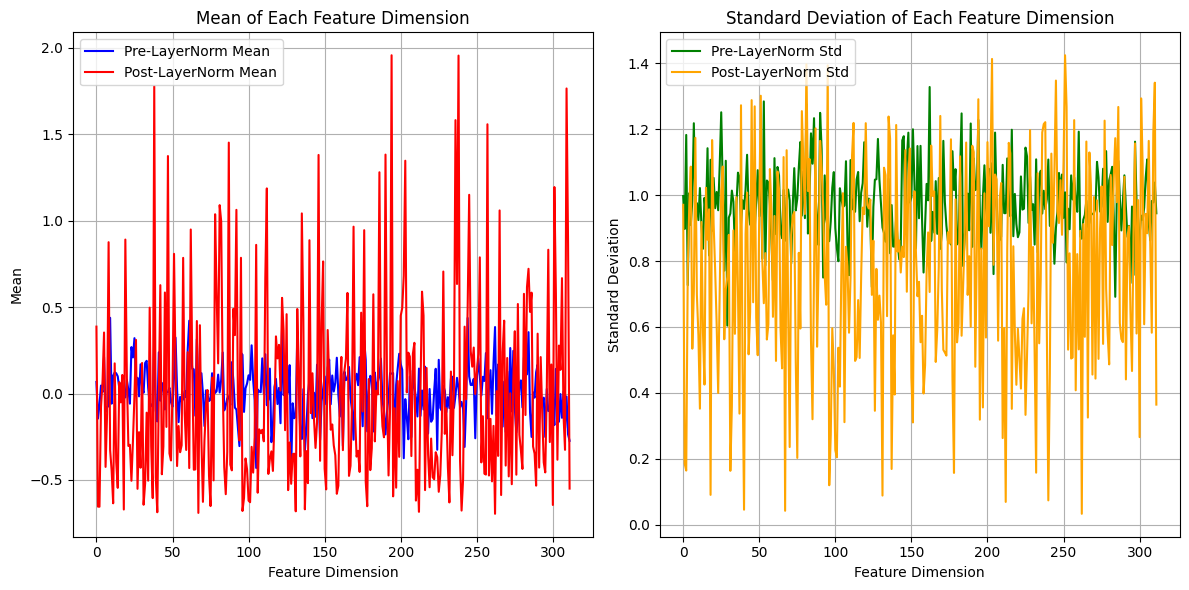

In [6]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 定义一个包含 LayerNorm 层的简单神经网络
class SimpleNet(nn.Module):
    def __init__(self, embedding_dim=312):
        super(SimpleNet, self).__init__()
        # 定义一个线性层
        self.linear1 = nn.Linear(embedding_dim, embedding_dim * 4)
        # 定义 ReLU 激活函数
        self.relu_1 = nn.ReLU()
        # 定义另一个线性层
        self.linear2 = nn.Linear(embedding_dim * 4, embedding_dim)
        # 定义 ReLU 激活函数
        self.relu_2 = nn.ReLU()
        # 定义 LayerNorm 层
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

    def forward(self, x):
        # 保存中间张量以便后续分析
        self.pre_layer_norm_x = x.clone().detach().cpu().numpy()
        # 通过第一个线性层
        x = self.linear1(x)
        # 应用第一个 ReLU 激活函数
        x = self.relu_1(x)
        # 通过第二个线性层
        x = self.linear2(x)
        # 应用第二个 ReLU 激活函数
        x = self.relu_2(x)
        # 应用 LayerNorm 层
        x = self.layer_norm(x)
        # 保存经过 LayerNorm 的张量以便后续分析
        self.post_layer_norm_x = x.clone().detach().cpu().numpy()
        return x

# 创建模型实例
model = SimpleNet()

# 创建一个示例输入张量，形状为 (batch_size, seq_len, embedding_dim)
batch_size = 4
seq_len = 10
embedding_dim = 312
input_tensor = torch.randn(batch_size, seq_len, embedding_dim)

# 进行前向传播
output_tensor = model(input_tensor)

# 计算输入张量的均值和标准差
pre_layer_norm_mean = model.pre_layer_norm_x.mean(axis=(0, 1))
pre_layer_norm_std = model.pre_layer_norm_x.std(axis=(0, 1))

# 计算输出张量的均值和标准差
post_layer_norm_mean = model.post_layer_norm_x.mean(axis=(0, 1))
post_layer_norm_std = model.post_layer_norm_x.std(axis=(0, 1))

# 绘制均值和标准差曲线
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(pre_layer_norm_mean, label='Pre-LayerNorm Mean', color='blue')
plt.plot(post_layer_norm_mean, label='Post-LayerNorm Mean', color='red')
plt.title('Mean of Each Feature Dimension')
plt.xlabel('Feature Dimension')
plt.ylabel('Mean')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(pre_layer_norm_std, label='Pre-LayerNorm Std', color='green')
plt.plot(post_layer_norm_std, label='Post-LayerNorm Std', color='orange')
plt.title('Standard Deviation of Each Feature Dimension')
plt.xlabel('Feature Dimension')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()





Input Tensor Shape: torch.Size([4, 10, 312])
Output Tensor Shape: torch.Size([4, 8, 10, 39])


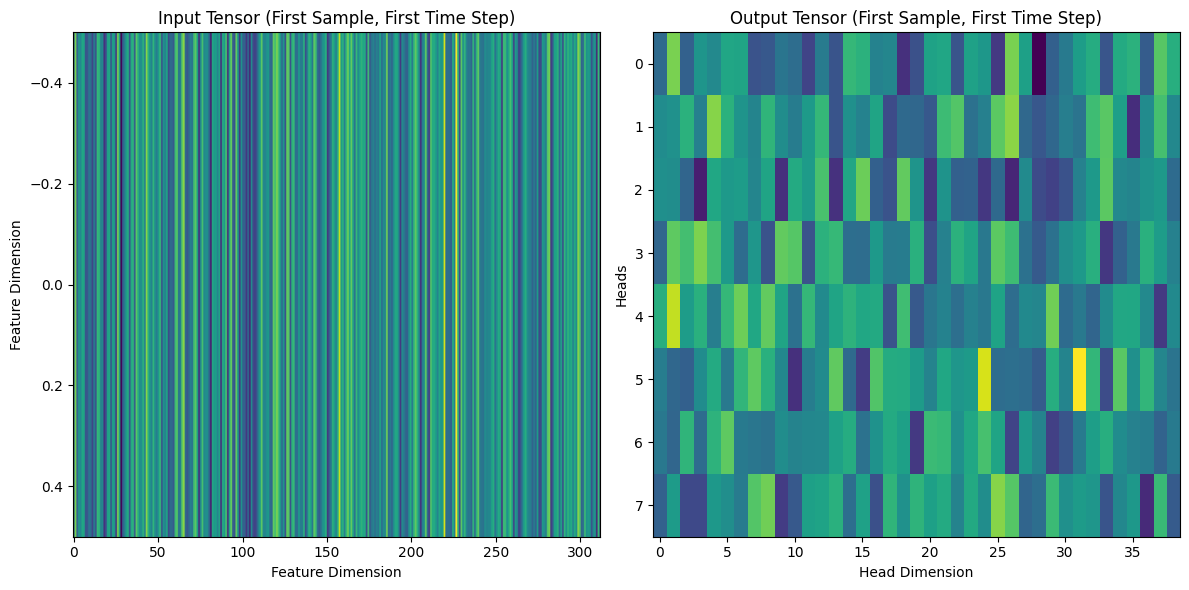

In [9]:
import torch
import torch.nn as nn
from einops import rearrange
import matplotlib.pyplot as plt

# 定义一个包含 LayerNorm 层的简单神经网络
class SimpleNet(nn.Module):
    def __init__(self, embedding_dim=312, h_head=8):
        super(SimpleNet, self).__init__()
        self.embedding_dim = embedding_dim
        self.h_head = h_head
        # 确保 embedding_dim 能被 h_head 整除
        assert embedding_dim % h_head == 0, "embedding_dim must be divisible by h_head"
        self.head_dim = embedding_dim // h_head

    def split_tensor(self, tensor):
        embedding = rearrange(tensor, "b l (h d) -> b l h d", h=self.h_head)
        embedding = rearrange(embedding, "b l h d -> b h l d", h=self.h_head)
        return embedding

# 创建模型实例
model = SimpleNet(embedding_dim=312, h_head=8)

# 创建一个示例输入张量，形状为 (batch_size, sequence_length, embedding_dim)
batch_size = 4
seq_len = 10
embedding_dim = 312
input_tensor = torch.randn(batch_size, seq_len, embedding_dim)

# 进行前向传播
output_tensor = model.split_tensor(input_tensor)

# 打印输入和输出张量的形状
print("Input Tensor Shape:", input_tensor.shape)
print("Output Tensor Shape:", output_tensor.shape)

# 可视化输入张量的第一个样本和第一个时间步的特征
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(input_tensor[0, 0].unsqueeze(0).numpy(), aspect='auto', cmap='viridis')
plt.title('Input Tensor (First Sample, First Time Step)')
plt.xlabel('Feature Dimension')
plt.ylabel('Feature Dimension')

plt.subplot(1, 2, 2)
plt.imshow(output_tensor[0, :, 0].reshape(model.h_head, model.head_dim).numpy(), aspect='auto', cmap='viridis')
plt.title('Output Tensor (First Sample, First Time Step)')
plt.xlabel('Head Dimension')
plt.ylabel('Heads')

plt.tight_layout()
plt.show()





Input Tensor:
tensor([[[ 0.0245, -0.1271, -0.1741,  0.4844, -0.5985,  1.0763,  0.4593,
           0.2926],
         [ 1.1344, -0.3592, -0.9755, -1.9466,  1.0469,  0.8687,  0.2784,
           0.4870],
         [ 0.3655,  0.7017, -1.6857,  0.0152, -0.6431,  0.5829,  0.5310,
           1.2795]],

        [[-1.3705,  0.7282,  0.2695, -0.3934,  0.5372, -0.1469, -0.2535,
          -0.1371],
         [ 0.1291,  0.6363, -0.2285,  0.5811, -0.5419,  0.0044,  2.1735,
          -0.0385],
         [ 0.4761, -0.0615, -0.7602, -0.2038,  0.4041, -1.3321, -0.5330,
          -0.3237]]])
Shape: torch.Size([2, 3, 8])

After First Rearrange:
tensor([[[[ 0.0245, -0.1271, -0.1741,  0.4844],
          [-0.5985,  1.0763,  0.4593,  0.2926]],

         [[ 1.1344, -0.3592, -0.9755, -1.9466],
          [ 1.0469,  0.8687,  0.2784,  0.4870]],

         [[ 0.3655,  0.7017, -1.6857,  0.0152],
          [-0.6431,  0.5829,  0.5310,  1.2795]]],


        [[[-1.3705,  0.7282,  0.2695, -0.3934],
          [ 0.5372, -0.1469

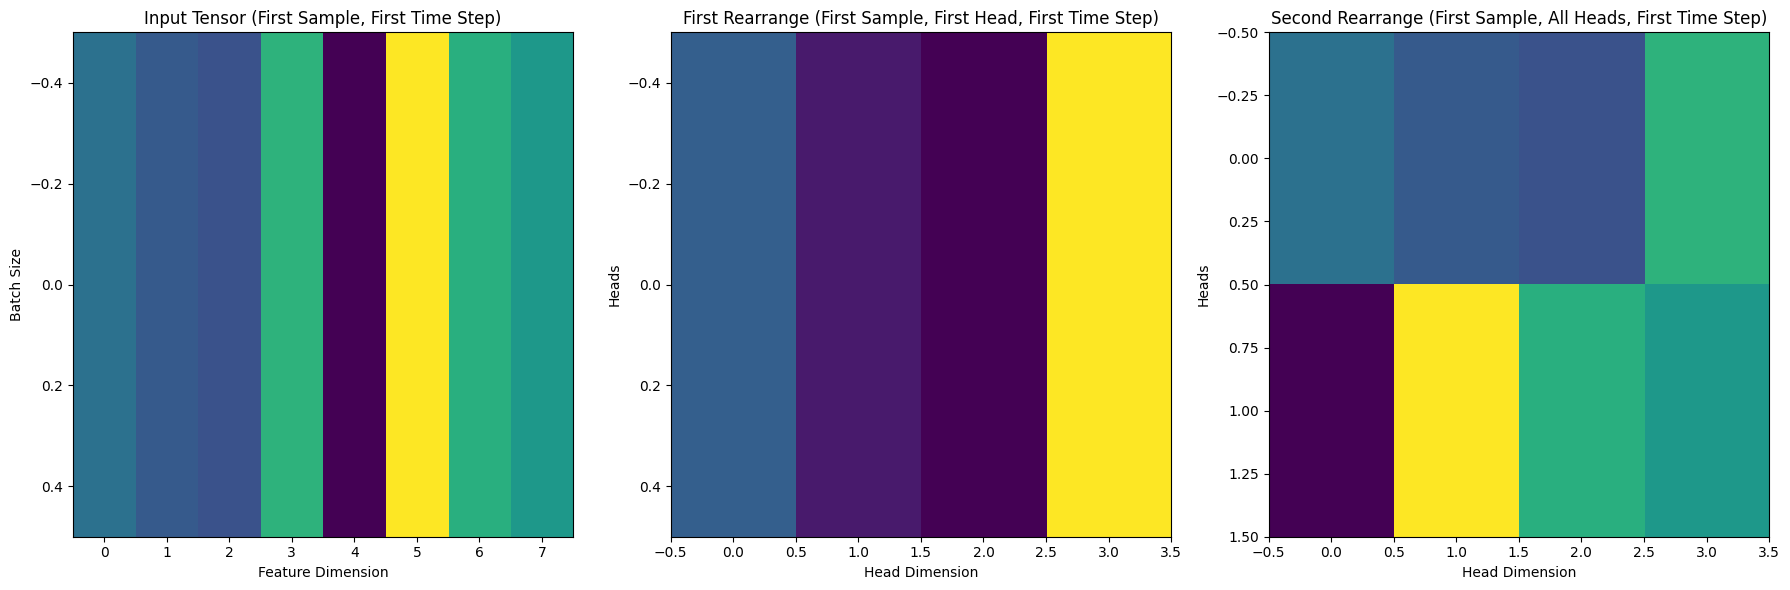

In [17]:
import torch
from einops import rearrange
import matplotlib.pyplot as plt
# 定义参数
batch_size = 2
seq_len = 3
embedding_dim = 8
h_head = 2

# 创建一个示例输入张量
input_tensor = torch.randn(batch_size, seq_len, embedding_dim)

print("Input Tensor:")
print(input_tensor)
print("Shape:", input_tensor.shape)


# 第一个 rearrange 操作 将输入张量的形状从 (2, 3, 8) 转换为 (2, 3, 2, 4)
embedding = rearrange(input_tensor, "b l (h d) -> b l h d", h=h_head)

print("\nAfter First Rearrange:")
print(embedding)
print("Shape:", embedding.shape)

# 第二个 rearrange 操作 将张量的形状从 (2, 3, 2, 4) 转换为 (2, 2, 3, 4)
embedding = rearrange(embedding, "b l h d -> b h l d", h=h_head)

print("\nAfter Second Rearrange:")
print(embedding)
print("Shape:", embedding.shape)

# 可视化输入张量的第一个样本和第一个时间步的特征
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(input_tensor[0, 0].unsqueeze(0).numpy(), aspect='auto', cmap='viridis')
plt.title('Input Tensor (First Sample, First Time Step)')
plt.xlabel('Feature Dimension')
plt.ylabel('Batch Size')

plt.subplot(1, 3, 2)
plt.imshow(embedding[0, 0, 0].unsqueeze(0).numpy(), aspect='auto', cmap='viridis')
plt.title('First Rearrange (First Sample, First Head, First Time Step)')
plt.xlabel('Head Dimension')
plt.ylabel('Heads')

plt.subplot(1, 3, 3)
plt.imshow(embedding[0, :, 0].reshape(h_head, -1).numpy(), aspect='auto', cmap='viridis')
plt.title('Second Rearrange (First Sample, All Heads, First Time Step)')
plt.xlabel('Head Dimension')
plt.ylabel('Heads')

plt.tight_layout()
plt.show()

In [19]:
import torch
import torch.nn as nn

# 定义输入特征数和输出特征数
in_features = 10
out_features = 5

# 创建一个Linear层实例
linear_layer = nn.Linear(in_features, out_features)

# 随机生成一个输入张量，形状为 (batch_size, in_features)
batch_size = 8
input_tensor = torch.randn(batch_size, in_features)

# 将输入张量传递给Linear层
output_tensor = linear_layer(input_tensor)

print("Input Tensor Shape:", input_tensor.shape)
print("Input Tensor :", input_tensor)
print("=====================")
print("Output Tensor Shape:", output_tensor.shape)
print("Output Tensor:", output_tensor)





Input Tensor Shape: torch.Size([8, 10])
Input Tensor : tensor([[ 1.3066, -0.9023,  0.7962, -0.4502,  1.4909,  1.7338,  0.4885,  1.4723,
         -0.0420,  1.7991],
        [ 0.3255, -2.5863,  0.0105, -0.4976, -0.6981,  2.2513,  1.0093, -0.7493,
         -0.1317, -0.9794],
        [-1.1193,  1.3917,  1.0843,  0.5300, -0.4004,  1.0499,  0.7168,  1.3745,
         -2.1478, -2.0488],
        [-1.8779,  0.7428,  0.2335,  0.0574,  0.8052, -0.4299,  1.0679, -1.5384,
         -2.4878,  0.2734],
        [-0.6774, -0.1453, -0.1249, -0.7877, -1.8816,  0.5023,  1.0755,  0.1612,
         -0.3451,  0.1261],
        [-0.4456,  0.5544, -1.0203,  0.2911, -0.2742,  0.8461, -0.4283, -0.1808,
         -0.9036,  0.2885],
        [ 2.0140,  1.4614,  2.1074, -1.2641,  1.6598,  0.3079, -1.0362,  0.3386,
         -0.2423, -1.8740],
        [ 1.0981,  0.0723,  0.7092, -0.6415,  1.1050,  1.9806, -0.7444, -0.7547,
          1.3056, -0.0534]])
Output Tensor Shape: torch.Size([8, 5])
Output Tensor: tensor([[ 0.4953,

In [20]:
import torch
import torch.nn.functional as F

# 定义一些超参数
batch_size = 2
num_heads = 3
seq_len = 4
head_dim = 5

# 随机生成 query 和 key 张量
query_splited = torch.randn(batch_size, num_heads, seq_len, head_dim)
key_splited = torch.randn(batch_size, num_heads, seq_len, head_dim)

# 创建一个掩码，假设我们想屏蔽某些位置
# 掩码的形状为 (batch_size, num_heads, seq_len, seq_len)
# 1 表示有效位置，0 表示无效位置
mask = torch.tensor([
    [[
        [1, 1, 1, 0],  # 第一个查询向量的有效位置
        [1, 1, 1, 0],
        [1, 1, 1, 0],
        [0, 0, 0, 0]
    ],
    [
        [1, 1, 0, 0],  # 第二个查询向量的有效位置
        [1, 1, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]
    ],
    [
        [1, 0, 0, 0],  # 第三个查询向量的有效位置
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]
    ]],
    [[
        [1, 1, 1, 1],  # 第一个查询向量的有效位置
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]
    ],
    [
        [1, 1, 1, 1],  # 第二个查询向量的有效位置
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]
    ],
    [
        [1, 1, 1, 1],  # 第三个查询向量的有效位置
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]
    ]]
])

# 计算 query 与 key 之间的权重系数
attention_prob = torch.matmul(query_splited, key_splited.transpose(-2, -1)) / (head_dim ** 0.5)

# 使用 softmax 对权重系数进行归一化计算
attention_prob += (1 - mask) * -1e5  # 在自注意力权重基础上加上掩模值
attention_prob = torch.softmax(attention_prob, dim=-1)

print("Query Tensor Shape:", query_splited.shape)
print("Key Tensor Shape:", key_splited.shape)
print("Mask Shape:", mask.shape)
print("Attention Probabilities:\n", attention_prob)





Query Tensor Shape: torch.Size([2, 3, 4, 5])
Key Tensor Shape: torch.Size([2, 3, 4, 5])
Mask Shape: torch.Size([2, 3, 4, 4])
Attention Probabilities:
 tensor([[[[0.1223, 0.2154, 0.6623, 0.0000],
          [0.0469, 0.8605, 0.0926, 0.0000],
          [0.1574, 0.7690, 0.0736, 0.0000],
          [0.2681, 0.0270, 0.3607, 0.3442]],

         [[0.6072, 0.3928, 0.0000, 0.0000],
          [0.1533, 0.8467, 0.0000, 0.0000],
          [0.1734, 0.1309, 0.6343, 0.0614],
          [0.0625, 0.4014, 0.0630, 0.4730]],

         [[1.0000, 0.0000, 0.0000, 0.0000],
          [0.0643, 0.4225, 0.3969, 0.1164],
          [0.2147, 0.0630, 0.6117, 0.1105],
          [0.5088, 0.0994, 0.0608, 0.3311]]],


        [[[0.2549, 0.3365, 0.1803, 0.2283],
          [0.1705, 0.3051, 0.1720, 0.3524],
          [0.3372, 0.2465, 0.2138, 0.2024],
          [0.2436, 0.3585, 0.2145, 0.1833]],

         [[0.2851, 0.4119, 0.1695, 0.1335],
          [0.3480, 0.2277, 0.2247, 0.1996],
          [0.5763, 0.0674, 0.2191, 0.1371],
   

In [21]:
import torch
import torch.nn as nn
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model=312, dropout=0.05, max_len=80):
        """
        :param d_model: pe编码维度，一般与word embedding相同，方便相加
        :param dropout: drop out
        :param max_len: 语料库中最长句子的长度，即word embedding中的L
        """
        super(PositionalEncoding, self).__init__()
        # 定义drop out
        self.dropout = nn.Dropout(p=dropout)
        
        # 计算pe编码
        pe = torch.zeros(max_len, d_model)  # 建立空表，每行代表一个词的位置，每列代表一个编码位
        position = torch.arange(0, max_len).unsqueeze(1)  # 建个arrange表示词的位置以便公式计算，size=(max_len,1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))  # 计算公式中10000**(2i/d_model)
        pe[:, 0::2] = torch.sin(position * div_term)  # 计算偶数维度的pe值
        pe[:, 1::2] = torch.cos(position * div_term)  # 计算奇数维度的pe值
        pe = pe.unsqueeze(0)  # size=(1, L, d_model)，为了后续与word_embedding相加,意为batch维度下的操作相同
        self.register_buffer("pe", pe)  # pe值是不参加训练的
    
    def forward(self, x):
        # 输入的最终编码 = word_embedding + positional_embedding
        x = x + self.pe[:, : x.size(1)].clone().detach().requires_grad_(False)
        return self.dropout(x)  # size = [batch, L, d_model]

# 示例用法
if __name__ == "__main__":
    batch_size = 2
    seq_len = 5
    d_model = 312

    # 创建一个随机的词嵌入张量
    word_embeddings = torch.randn(batch_size, seq_len, d_model)

    # 创建位置编码层实例
    pos_encoder = PositionalEncoding(d_model=d_model, dropout=0.1, max_len=seq_len)

    # 应用位置编码
    output = pos_encoder(word_embeddings)

    print("Word Embeddings Shape:", word_embeddings.shape)
    print("Output Shape:", output.shape)
    print("Output:\n", output)





Word Embeddings Shape: torch.Size([2, 5, 312])
Output Shape: torch.Size([2, 5, 312])
Output:
 tensor([[[-0.0916,  1.3032,  1.3892,  ...,  3.0760, -0.7647,  0.6595],
         [ 0.3711,  1.8079,  0.5385,  ...,  0.0000, -0.6064,  1.6297],
         [ 1.9498, -1.4378, -0.5919,  ...,  1.6825,  1.2026, -0.9218],
         [-1.0317, -0.9792, -0.6632,  ...,  0.6786,  0.8244,  2.3523],
         [-1.5505, -0.1259,  1.3341,  ...,  0.9369,  0.7040,  1.4859]],

        [[-0.9914,  0.0000,  1.1840,  ..., -0.1147,  3.3899,  1.6931],
         [ 0.6532,  0.2942,  0.5474,  ...,  1.9104,  0.0953,  0.6034],
         [-0.4228,  0.0320,  0.5879,  ...,  1.5287, -0.5196,  2.1994],
         [-0.2960, -0.4368,  1.3606,  ...,  0.6144, -1.4974,  0.0000],
         [ 0.9596, -0.0126, -0.4664,  ...,  1.8280,  1.1587,  3.3535]]])


In [22]:
import torch
import torch.nn as nn
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model=312, dropout=0.05, max_len=80):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer("pe", pe)
    
    def forward(self, x):
        x = x + self.pe[:, : x.size(1)].clone().detach().requires_grad_(False)
        return self.dropout(x)

class Attention(nn.Module):
    def __init__(self, embed_dim, hidden_dim, num_heads):
        super(Attention, self).__init__()
        self.embed_dim = embed_dim
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads
        
        assert (
            self.head_dim * num_heads == embed_dim
        ), "Embedding dimension must be divisible by number of heads"
        
        self.query_proj = nn.Linear(embed_dim, hidden_dim)
        self.key_proj = nn.Linear(embed_dim, hidden_dim)
        self.value_proj = nn.Linear(embed_dim, hidden_dim)
        self.out_proj = nn.Linear(hidden_dim, embed_dim)
    
    def forward(self, value, key, query, mask=None):
        batch_size = query.shape[0]
        
        # Linear projections
        query = self.query_proj(query)
        key = self.key_proj(key)
        value = self.value_proj(value)
        
        # Reshape to multiple heads
        query = query.view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        key = key.view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        value = value.view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        
        # Compute attention scores
        scores = torch.matmul(query, key.transpose(-2, -1)) / (self.head_dim ** 0.5)
        
        if mask is not None:
            scores += (1 - mask) * -1e9
        
        # Apply softmax
        attn_probs = torch.softmax(scores, dim=-1)
        
        # Apply dropout
        attn_probs = nn.Dropout(0.1)(attn_probs)
        
        # Multiply by values
        output = torch.matmul(attn_probs, value)
        
        # Concatenate heads and project back
        output = output.transpose(1, 2).contiguous().view(batch_size, -1, self.hidden_dim)
        output = self.out_proj(output)
        
        return output

class FeedForWard(nn.Module):
    def __init__(self, embed_dim=312, hidden_dim=1248):
        super(FeedForWard, self).__init__()
        self.fc1 = nn.Linear(embed_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, embed_dim)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

class Encoder(nn.Module):
    def __init__(
        self,
        vocab_size=1024,
        max_length=80,
        embedding_size=312,
        n_head=6,
        scale=4,
        n_layer=3,
    ):
        super().__init__()
        self.n_layer = n_layer
        self.embedding_table = nn.Embedding(
            num_embeddings=vocab_size, embedding_dim=embedding_size
        )
        self.position_embedding = PositionalEncoding(max_len=max_length)
        self.attention = Attention(embedding_size, embedding_size, n_head)
        self.feedforward = FeedForWard()

    def forward(self, token_inputs):
        token = token_inputs
        mask = self.create_mask(token)

        embedding = self.embedding_table(token)
        embedding = self.position_embedding(embedding)
        for _ in range(self.n_layer):
            embedding = self.attention(embedding, embedding, embedding, mask)
            embedding = nn.Dropout(0.1)(embedding)
            embedding = self.feedforward(embedding)

        return embedding

    def create_mask(self, seq):
        mask = torch.not_equal(seq, 0).float()
        mask = torch.unsqueeze(mask, dim=-1)
        mask = torch.unsqueeze(mask, dim=1)
        return mask

# 示例用法
if __name__ == "__main__":
    batch_size = 2
    seq_len = 5
    vocab_size = 1024
    embedding_size = 312

    # 创建一个随机的 token 输入张量
    token_inputs = torch.randint(1, vocab_size, (batch_size, seq_len))

    # 创建编码器实例
    encoder = Encoder(vocab_size=vocab_size, max_length=seq_len, embedding_size=embedding_size)

    # 应用编码器
    output = encoder(token_inputs)

    print("Token Inputs Shape:", token_inputs.shape)
    print("Output Shape:", output.shape)
    print("Output:\n", output)





Token Inputs Shape: torch.Size([2, 5])
Output Shape: torch.Size([2, 5, 312])
Output:
 tensor([[[-0.0032, -0.0271, -0.0184,  ..., -0.0109, -0.0225, -0.0015],
         [-0.0017, -0.0274, -0.0237,  ..., -0.0014, -0.0248,  0.0003],
         [-0.0053, -0.0288, -0.0267,  ..., -0.0013, -0.0250, -0.0024],
         [-0.0035, -0.0214, -0.0268,  ..., -0.0051, -0.0186,  0.0049],
         [-0.0054, -0.0248, -0.0270,  ..., -0.0034, -0.0215,  0.0038]],

        [[-0.0039, -0.0315, -0.0219,  ..., -0.0062, -0.0210,  0.0021],
         [-0.0103, -0.0276, -0.0272,  ..., -0.0094, -0.0164,  0.0011],
         [-0.0058, -0.0307, -0.0282,  ..., -0.0046, -0.0180,  0.0037],
         [-0.0120, -0.0240, -0.0216,  ..., -0.0057, -0.0262,  0.0023],
         [-0.0041, -0.0263, -0.0321,  ..., -0.0042, -0.0205,  0.0023]]],
       grad_fn=<ViewBackward0>)


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定义一个简单的模型
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(10, 1)
    
    def forward(self, x):
        return self.fc(x)

# 初始化模型和优化器
model = SimpleModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 生成一些随机数据
inputs = torch.randn(5, 10)
targets = torch.randn(5, 1)

# 训练循环
num_epochs = 30
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 打印损失
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
        
        # 保存模型和优化器状态到独立文件
        state = {
            "net": model.state_dict(),
            "optimizer": optimizer.state_dict(),
            "epoch": epoch,
        }
        filename = f"./modelpara_epoch_{epoch+1}.pt"
        torch.save(state, filename)

print("Training complete.")





Epoch [10/30], Loss: 0.7140
Epoch [20/30], Loss: 0.4207
Epoch [30/30], Loss: 0.2506
Training complete.


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import os  # 导入 os 模块

# 定义一个简单的模型
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(10, 1)
    
    def forward(self, x):
        return self.fc(x)

# 初始化模型和优化器
model = SimpleModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 加载保存的状态
checkpoint_path = "./modelpara_epoch_30.pt"  # 替换为你要加载的文件路径
if os.path.exists(checkpoint_path):  # 使用 os.path.exists 检查文件是否存在
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint["net"])
    optimizer.load_state_dict(checkpoint["optimizer"])
    start_epoch = checkpoint["epoch"] + 1  # 继续从下一个 epoch 开始
    print(f"Resuming training from epoch {start_epoch}")
else:
    print(f"No checkpoint found at {checkpoint_path}. Starting from scratch.")
    start_epoch = 0

# 生成一些随机数据
inputs = torch.randn(5, 10)
targets = torch.randn(5, 1)

# 训练循环
num_epochs = 100
for epoch in range(start_epoch, num_epochs):
    # 前向传播
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 打印损失
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
        
        # 保存模型和优化器状态到独立文件
        state = {
            "net": model.state_dict(),
            "optimizer": optimizer.state_dict(),
            "epoch": epoch,
        }
        filename = f"./modelpara_epoch_{epoch+1}.pt"
        torch.save(state, filename)

print("Training complete.")









Resuming training from epoch 30
Epoch [40/100], Loss: 1.0576
Epoch [50/100], Loss: 0.6254
Epoch [60/100], Loss: 0.3982
Epoch [70/100], Loss: 0.2698
Epoch [80/100], Loss: 0.1933
Epoch [90/100], Loss: 0.1454
Epoch [100/100], Loss: 0.1140
Training complete.


In [5]:
import torch
import torch.nn as nn
import os  # 导入 os 模块

# 定义一个简单的模型
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(10, 1)
    
    def forward(self, x):
        return self.fc(x)

# 初始化模型
model = SimpleModel()

# 加载保存的状态
checkpoint_path = "./modelpara_epoch_30.pt"  # 替换为你要加载的文件路径
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint["net"])
    print(f"Model loaded from {checkpoint_path}.")
else:
    print(f"No checkpoint found at {checkpoint_path}. Please provide a valid checkpoint file.")
    exit()

# 设置模型为评估模式
model.eval()

# 生成一些随机测试数据
test_inputs = torch.randn(5, 10)
test_targets = torch.randn(5, 1)

# 评估模型
with torch.no_grad():
    test_outputs = model(test_inputs)
    criterion = nn.MSELoss()
    test_loss = criterion(test_outputs, test_targets)
    print(f"Evaluation Loss: {test_loss.item():.4f}")

# 可选：打印预测输出和真实目标
print("Test Inputs:\n", test_inputs)
print("Test Targets:\n", test_targets)
print("Test Outputs:\n", test_outputs)





Model loaded from ./modelpara_epoch_30.pt.
Evaluation Loss: 1.0328
Test Inputs:
 tensor([[ 0.0259, -0.0697,  0.4996, -0.5280,  1.0164, -1.7106, -0.6356,  1.1691,
         -0.1995, -0.8844],
        [ 1.3731,  0.7994,  1.3362, -0.7473,  0.7613,  0.7943,  1.0196, -1.3697,
          0.3415,  0.5752],
        [-1.1312, -0.1020, -1.9715,  0.3276, -0.8684, -0.6989, -0.3372, -0.2075,
          1.2202, -1.6781],
        [-1.6840,  0.1477, -0.1970,  0.6399,  0.4338,  0.3011, -0.8234, -0.0516,
         -0.0779, -0.5318],
        [ 0.0187,  0.3224,  0.0884, -1.2105,  1.5277, -0.9573,  0.5508,  0.3370,
         -0.1204, -0.5899]])
Test Targets:
 tensor([[-0.3899],
        [-0.8006],
        [-0.8295],
        [ 0.6477],
        [-1.3345]])
Test Outputs:
 tensor([[-0.5619],
        [ 0.7233],
        [-0.1782],
        [-0.3688],
        [-0.1706]])


In [6]:
from transformers import BertModel, BertTokenizer
import torch

# 指定本地模型目录
local_model_path = "./model/bert-base-chinese/"

# 初始化 tokenizer 和 model
tokenizer = BertTokenizer.from_pretrained(local_model_path)
model = BertModel.from_pretrained(local_model_path)

# 示例文本
text = "春眠不觉晓"

# 对文本进行编码
inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)

# 使用模型进行前向传播
with torch.no_grad():
    outputs = model(**inputs)

# 获取最后一层的隐藏状态
last_hidden_states = outputs.last_hidden_state

print("Tokenized Input IDs:", inputs['input_ids'])
print("Last Hidden States Shape:", last_hidden_states.shape)
print("Last Hidden States:", last_hidden_states)





Tokenized Input IDs: tensor([[ 101, 3217, 4697,  679, 6230, 3236,  102]])
Last Hidden States Shape: torch.Size([1, 7, 768])
Last Hidden States: tensor([[[-5.8506e-01,  7.3750e-01, -5.0690e-01,  ...,  2.5307e-01,
          -3.4374e-01, -1.2907e-01],
         [-3.6748e-01,  5.7344e-01, -1.7764e-01,  ..., -7.4844e-01,
          -4.7334e-01,  3.9220e-01],
         [ 7.4338e-01, -8.9703e-01, -6.6481e-01,  ..., -1.3766e-01,
          -1.9935e-01,  3.8518e-01],
         ...,
         [ 9.1105e-01, -5.9463e-02, -1.2946e+00,  ...,  2.0501e-01,
          -3.4422e-01,  2.0282e-01],
         [ 3.0279e-01,  5.0761e-01, -1.0799e+00,  ..., -7.2889e-01,
          -6.6933e-01, -1.2681e-01],
         [-5.7582e-01,  6.6344e-02, -4.0232e-01,  ..., -4.8137e-04,
           1.5305e-01,  4.1425e-01]]])


In [10]:
import torch
from einops import rearrange

def creat_self_mask(from_tensor, to_tensor):
    """
      这里需要注意，from_tensor 是输入的文本序列，即 input_word_ids ，应该是2D的，即[1,2,3,4,5,6,0,0,0,0]
                  to_tensor 是输入的的 input_word_ids，应该是2D的，即[1,2,3,4,5,6,0,0,0,0]

                  最终的结果是输出2个3D的相乘，
                注意：后面如果需要4D的，则使用expand添加一个维度即可
    """
    batch_size, from_seq_length = from_tensor.shape
    # 这里只能做self attention，不能做交互
    # assert from_tensor == to_tensor,print("输入from_tensor与to_tensor不一致，检查mask创建部分,需要自己完成")

    # 注意这里的数据类型转换方法，from：https://wenku.baidu.com/view/e2e67e2eb868a98271fe910ef12d2af90242a86e.html?_wkts_=1672014945065&bdQuery=torch%E8%BD%AC%E5%8C%96%E6%95%B0%E6%8D%AE%E7%B1%BB%E5%9E%8B
    to_mask = torch.not_equal(from_tensor, 0).int()
    to_mask = elt.Rearrange("b l -> b 1 l")(to_mask)  # 这里扩充了数据类型

    broadcast_ones = torch.ones_like(to_tensor)
    broadcast_ones = torch.unsqueeze(broadcast_ones, dim=-1)


    # Here we broadcast along two dimensions to create the mask.
    mask = broadcast_ones * to_mask
    mask.to("mps")
    return mask

# Example usage
if __name__ == "__main__":
    tensor = torch.tensor([[1, 2, 0], [0, 3, 4]], dtype=torch.long)
    mask = create_self_mask(tensor)
    print(mask)





tensor([[[1, 1, 0]],

        [[0, 1, 1]]], device='mps:0', dtype=torch.int32)


In [11]:
import torch
import torch.nn as nn
import numpy as np

class ScaledDotProductAttention(nn.Module):
    def __init__(self):
        super(ScaledDotProductAttention, self).__init__()

    def forward(self, Q, K, V, attn_mask):
        '''
        Args:
            Q: Query tensor of shape [batch_size, n_heads, len_q, d_k]
            K: Key tensor of shape [batch_size, n_heads, len_k, d_k]
            V: Value tensor of shape [batch_size, n_heads, len_v(=len_k), d_v]
            attn_mask: Attention mask tensor of shape [batch_size, n_heads, seq_len, seq_len]
        
        Returns:
            context: Context vector of shape [batch_size, n_heads, len_q, d_v]
            attn: Attention weights of shape [batch_size, n_heads, len_q, len_k]
        '''
        # Step 1: Compute the dot product between Q and transposed K
        scores = torch.matmul(Q, K.transpose(-1, -2)) / np.sqrt(d_k)
        # scores : [batch_size, n_heads, len_q, len_k]
        
        # Step 2: Apply the attention mask
        scores.masked_fill_(attn_mask == 0, -1e9)
        # attn_mask all True parts (i.e., padding parts), scores fill with negative infinity
        # This ensures that these positions have no effect on softmax
        
        # Step 3: Apply softmax to get attention weights
        attn = nn.Softmax(dim=-1)(scores)
        # attn: [batch_size, n_heads, len_q, len_k]
        # Softmax is applied along the last dimension (len_k)
        
        # Step 4: Compute the context vector by multiplying attention weights with V
        context = torch.matmul(attn, V)
        # context: [batch_size, n_heads, len_q, d_v]
        
        return context, attn

# Example usage
if __name__ == "__main__":
    batch_size = 2
    n_heads = 8
    len_q = 5
    len_k = 5
    len_v = 5
    d_k = 64
    d_v = 64
    
    Q = torch.randn(batch_size, n_heads, len_q, d_k)
    K = torch.randn(batch_size, n_heads, len_k, d_k)
    V = torch.randn(batch_size, n_heads, len_v, d_v)
    attn_mask = torch.ones(batch_size, n_heads, len_q, len_k)  # No masking initially
    
    scaled_attention = ScaledDotProductAttention()
    context, attn = scaled_attention.forward(Q, K, V, attn_mask)
    
    print("Context Vector:\n", context)
    print("Attention Weights:\n", attn)

Context Vector:
 tensor([[[[ 7.7339e-01, -9.2240e-01,  2.7368e-01,  ...,  3.1921e-01,
           -2.8825e-01,  9.6870e-01],
          [ 3.6395e-01, -5.2295e-01, -3.6950e-02,  ...,  5.4335e-01,
            1.2027e-01,  6.3669e-01],
          [ 7.8508e-01, -3.5274e-01, -7.4715e-03,  ...,  4.8585e-01,
            3.6120e-01,  5.6186e-01],
          [ 4.7409e-01,  1.2856e-01,  1.8479e-01,  ...,  4.9810e-01,
            1.1052e+00,  5.8656e-02],
          [ 9.1775e-01, -7.6721e-01,  1.0477e-01,  ...,  4.9620e-01,
           -1.1654e-01,  8.5784e-01]],

         [[ 2.2997e-01,  4.5108e-01, -8.7667e-01,  ...,  2.5381e-03,
            6.5506e-01,  2.8297e-01],
          [ 1.4193e-02,  2.7915e-01, -7.3860e-01,  ...,  3.5653e-02,
            7.6331e-01,  5.8157e-01],
          [ 1.1926e-01,  2.4356e-01, -1.1673e+00,  ...,  1.6796e-04,
            6.9459e-01,  5.0131e-01],
          [-4.3238e-02,  2.4788e-01, -1.4145e+00,  ...,  4.8155e-01,
            3.0554e-01,  2.9703e-01],
          [-1.1656

In [1]:
import Box2D
print(Box2D.__version__)

2.3.10


In [5]:
import torch
from torch.distributions import Categorical
action_probs=torch.tensor([0.3,0.7])

print(action_probs)
dist=Categorical(action_probs)
c0=0
c1=1
for _ in range(10240):
    action=dist.sample()
    if action==0:
        c0+=1
    else:
        c1+=1
print ("c0 概率为：",c0/(c0+c1))
print("c1 概率为：",c1/(c0+c1))

tensor([0.3000, 0.7000])
c0 概率为： 0.2987989454154868
c1 概率为： 0.7012010545845132


In [8]:
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Flatten layer to convert 28x28 images into a single vector of size 784
        self.flatten = nn.Flatten()
        
        # Sequential container for stacking linear layers with ReLU activations
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 312),  # First linear layer: 784 -> 312
            nn.ReLU(),                # ReLU activation function
            nn.Linear(312, 256),      # Second linear layer: 312 -> 256
            nn.ReLU(),                # ReLU activation function
            nn.Linear(256, 10)        # Third linear layer: 256 -> 10 (output layer)
        )

    def forward(self, input):
        # Flatten the input tensor from shape [batch_size, 1, 28, 28] to [batch_size, 784]
        x = self.flatten(input)
        
        # Pass the flattened input through the sequential stack of layers
        logits = self.linear_relu_stack(x)
        
        # Return the raw output (logits) from the network
        return logits

# 创建神经网络实例
model = NeuralNetwork()

# 创建一个随机输入批次，模拟 MNIST 图像
batch_size = 32
input_tensor = torch.randn(batch_size, 1, 28, 28)

# 进行前向传播
output_logits = model(input_tensor)

# 打印输出形状
print("Output logits shape:", output_logits.shape)

# 使用 softmax 将 logits 转换为概率分布
softmax_output = torch.softmax(output_logits, dim=1)

# 获取每个样本的预测类别
predicted_classes = torch.argmax(softmax_output, dim=1)

# 打印前 5 个样本的 logits 和预测类别
for i in range(5):
    print(f"Sample {i}:")
    print(f"  Logits: {output_logits[i]}")
    print(f"  Predicted class: {predicted_classes[i].item()}")





Output logits shape: torch.Size([32, 10])
Sample 0:
  Logits: tensor([ 0.2902,  0.1180,  0.1082, -0.0871,  0.0870,  0.0268,  0.0989,  0.0513,
         0.1963,  0.0786], grad_fn=<SelectBackward0>)
  Predicted class: 0
Sample 1:
  Logits: tensor([ 0.1395,  0.1043,  0.0800, -0.0686,  0.0440,  0.0576,  0.0520, -0.1077,
         0.0142,  0.0679], grad_fn=<SelectBackward0>)
  Predicted class: 0
Sample 2:
  Logits: tensor([ 0.2361,  0.1547, -0.1380, -0.1355,  0.1678,  0.1237,  0.0642,  0.0527,
         0.0881, -0.0998], grad_fn=<SelectBackward0>)
  Predicted class: 0
Sample 3:
  Logits: tensor([ 0.2565,  0.0906, -0.0574, -0.0488,  0.3412,  0.1260,  0.0365, -0.0432,
         0.0803,  0.1376], grad_fn=<SelectBackward0>)
  Predicted class: 4
Sample 4:
  Logits: tensor([ 0.0293, -0.0292,  0.0100, -0.0665,  0.0655,  0.1353,  0.0376, -0.0019,
         0.0476,  0.0593], grad_fn=<SelectBackward0>)
  Predicted class: 5


In [8]:
import torch
image=torch.randn(size=(5,3,128,128))

conv2d=torch.nn.Conv2d(3,10,kernel_size=3,stride=1,padding=1)
image_new=conv2d(image)
print(image_new.shape)

torch.Size([5, 10, 128, 128])


In [5]:
import torch
import torch.nn as nn

# 定义一个卷积层
conv2d = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=1)

# 打印卷积层的权重，即滤波器
filters = conv2d.weight

print("滤波器的形状:", filters.shape)  # 应输出: torch.Size([10, 3, 3, 3])

# 打印每个滤波器
for i in range(filters.shape[0]):  # 遍历每个滤波器
    print(f"\n第 {i+1} 个滤波器:")
    for channel in range(filters.shape[1]):  # 遍历每个通道
        print(f"通道 {channel+1}:")
        print(filters[i, channel])

滤波器的形状: torch.Size([6, 3, 3, 3])

第 1 个滤波器:
通道 1:
tensor([[-0.0728, -0.1276,  0.1130],
        [-0.0057, -0.1833, -0.0415],
        [ 0.1183, -0.1682, -0.0308]], grad_fn=<SelectBackward0>)
通道 2:
tensor([[ 0.1034,  0.1588, -0.1280],
        [ 0.0157,  0.1576, -0.0149],
        [ 0.0500, -0.0464,  0.0468]], grad_fn=<SelectBackward0>)
通道 3:
tensor([[-0.1804,  0.1811, -0.1106],
        [ 0.1707, -0.1354, -0.0336],
        [ 0.1788, -0.1628,  0.0977]], grad_fn=<SelectBackward0>)

第 2 个滤波器:
通道 1:
tensor([[ 0.0957, -0.1758,  0.0034],
        [-0.1212,  0.1538,  0.0177],
        [ 0.1030,  0.0594, -0.1579]], grad_fn=<SelectBackward0>)
通道 2:
tensor([[-0.1149,  0.0583, -0.0250],
        [-0.1742,  0.1917, -0.0347],
        [-0.1096,  0.1423,  0.0120]], grad_fn=<SelectBackward0>)
通道 3:
tensor([[ 0.0192, -0.1497,  0.1796],
        [-0.1725,  0.1305, -0.1703],
        [-0.1838, -0.1385, -0.1476]], grad_fn=<SelectBackward0>)

第 3 个滤波器:
通道 1:
tensor([[-0.0762,  0.0612, -0.1520],
        [ 0.1125,  0.

In [9]:
import torch
image=torch.randn(size=(5,3,28,28))
pool=torch.nn.AvgPool2d(kernel_size=3,stride=2,padding=0)
image_pooled=pool(image)
print(image_pooled.shape)


torch.Size([5, 3, 13, 13])
